<a href="https://colab.research.google.com/github/IC-03/InTime-UIS/blob/main/grafoMD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
---------------- NOMENCLATURA DE LOS EDIFICIOS: -------------------------|
- EN: Entrada de la 27         | - FINGF: Facultad de Fisicomecanicas
- CH: Ciencias Humanas         | - DI: Diseño industrial
- IM: Ingenieria Mecanica      | - CEIM:              
- CT: Camilo Torres            | - CAYFAV: CapriuisyFavuis
- CEN: Centic                  | - LABAT: Laboratorio de alta tension
- FDC : Facultad de Ciencias   | - LABDI: Laboratorio de diseli undustrial
- IE: Ingenieria Electrica     | - LABHI: Laboratorio de Hidraulica
- II: Ingenieria Industrial    | - PDA: Planta de Aceros
- IL: Instituto de Lenguas     | - JBV: Jorge Bautista V
- IQ: Ingenieria Quimica       | - DACA: Daniel Casas
- AMM: Aula Maxima de Mecanica | - AMF: Aula Maxima de Fisica
-E3T: Electrica Electronica y Telecomunicaciones 

'''

In [135]:
import networkx as nx
import networkx.algorithms.isomorphism as iso
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Esto nos ayuda a cargar el archivo de excel para convertir a csv
from google.colab import files
files.upload()

In [137]:
#Convirtiendo el archivo excel a data Frame
df = pd.read_excel("grafo.xlsx", index_col=None)

In [138]:
df.head()

,Origen,Destino,Peso
0,EN,I0,180
1,IL,I0,85
2,IL,I1,121
3,AMM,I1,17
4,IM,I1,25


In [139]:
G = nx.from_pandas_edgelist(df,source='Origen',target='Destino',edge_attr='Peso')

In [140]:
#Nodos del Grafo
G.nodes()

NodeView(('EN', 'I0', 'IL', 'I1', 'AMM', 'IM', 'CT', 'I2', 'CEN', 'I3', 'FDC', 'IQ', 'AMF', 'CAYFA', 'JBV', 'I4', 'PDA', 'FINGF', 'DACA', 'I5', 'CEIAM', 'I6', 'DI', 'I7', 'II', 'E3T', 'I8', 'LABAT', 'LABHI', 'TDI', 'I9', 'CH'))

In [141]:
#Aristas del Grafo 
G.edges()

EdgeView([('EN', 'I0'), ('EN', 'I9'), ('I0', 'IL'), ('I0', 'I1'), ('IL', 'I1'), ('IL', 'I6'), ('I1', 'AMM'), ('I1', 'IM'), ('I1', 'I2'), ('IM', 'I9'), ('CT', 'I2'), ('CT', 'I3'), ('I2', 'CEN'), ('I2', 'I6'), ('I2', 'I9'), ('I2', 'I3'), ('CEN', 'I3'), ('I3', 'FDC'), ('I3', 'IQ'), ('I3', 'AMF'), ('I3', 'CAYFA'), ('I3', 'I4'), ('AMF', 'I8'), ('CAYFA', 'I8'), ('JBV', 'I4'), ('I4', 'PDA'), ('I4', 'FINGF'), ('I4', 'I5'), ('DACA', 'I5'), ('I5', 'CEIAM'), ('I6', 'DI'), ('I6', 'I7'), ('DI', 'I7'), ('I7', 'II'), ('I7', 'E3T'), ('I7', 'I8'), ('E3T', 'I8'), ('I8', 'LABAT'), ('I8', 'LABHI'), ('I8', 'TDI'), ('I9', 'CH')])

In [142]:
#Grado del Grafo 
G.order()

32

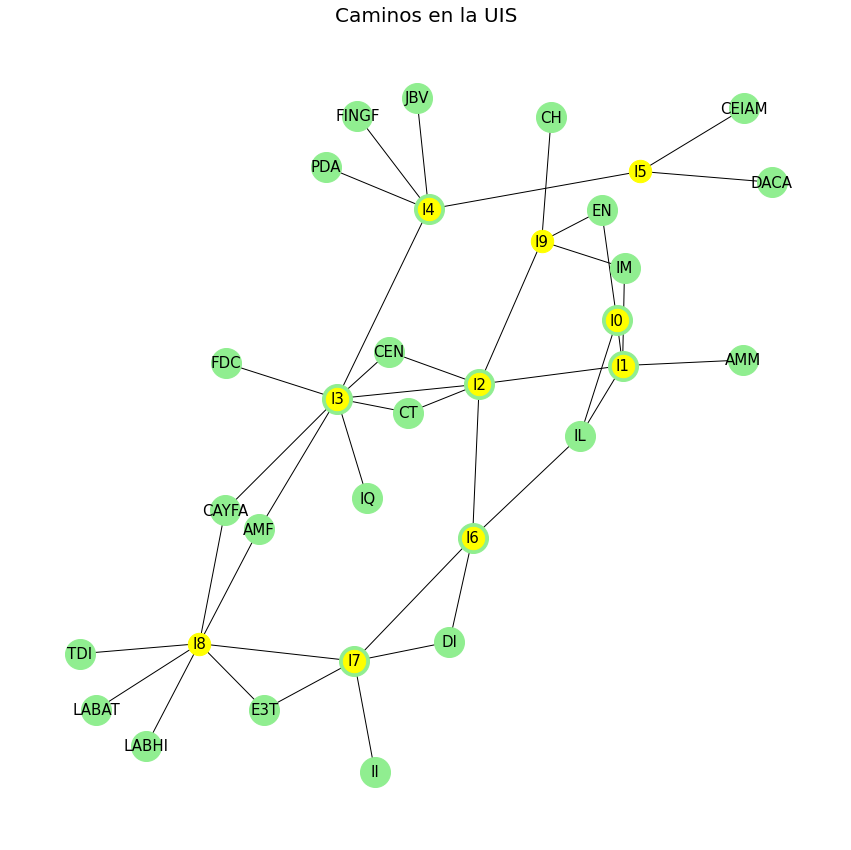

In [143]:
#Se grafica el grafo
fig, ax = plt.subplots(figsize=(15, 15)) #Tamaño de la gráfica

#Distancia de los grafos
seed = 13648 
pos = nx.spring_layout(G, seed=seed)

#Configuración para los nodos
inter = list(df.Destino.unique())
edif = list(df.Origen.unique())
#Total = dict(zip(edif, inter))

nx.draw_networkx_nodes(G, pos, nodelist=edif, node_size=900, node_color='lightgreen') #Para los edificios
nx.draw_networkx_nodes(G, pos, nodelist=inter, node_size=500, node_color='yellow') #Para las intersecciones

#Configuración para las aristas
nx.draw_networkx_edges(G, pos, edge_color='black')

#Configuración para las etiquetas de la gráfica
nx.draw_networkx_labels(G, pos, font_size=15)

plt.title("Caminos en la UIS", fontdict={'fontsize':20})
plt.axis('off')
plt.show()

In [144]:
#Se realiza una prueba utilizando el algoritmo de Dijsktra
djk_path= nx.dijkstra_path(G, source='EN', target='LABAT', weight='Peso')
djk_path

['EN', 'I9', 'I2', 'CT', 'I3', 'AMF', 'I8', 'LABAT']

In [145]:
#Se realiza una sefunda prueba utilizando el algoritmo de Dijsktra y pidiendole el inicio y fin de la ruta
print("Escribe las inicales de los edificos en ***Mayuscula***")
x= input("Ingresa las iniciales del edifico de Inicio: ")
y= input("Ingresa las iniciales del edifico de Destino: ")

djk_path= nx.dijkstra_path(G, source= x, target= y, weight='Peso')
djk_path

Escribe las inicales de los edificos en ***Mayuscula***
Ingresa las iniciales del edifico de Inicio: EN
Ingresa las iniciales del edifico de Destino: LABAT


['EN', 'I9', 'I2', 'CT', 'I3', 'AMF', 'I8', 'LABAT']

In [146]:
#En esta impresion a pantalla mostramos la cantidad total de puntos por lo que el usuario recorre y la distancia total en metros.
print(f"Utd recorrera en total: {len(djk_path)} puntos.\n La distancia en metros es {nx.dijkstra_path_length(G, 'EN', 'LABAT', 'Peso')}")

Utd recorrera en total: 8 puntos.
 La distancia en metros es 435


In [147]:
#Este archivo nos  ayuda a exportar el grafo graficado 
#mas arriba a un archivo modificable en ghepi y asi realizar mas "Bonito el grafo"
nx.write_gexf(G,'grafo.gexf',version='1.2draft')